# WUM - projekt 2 - milestone 1
## EDA
#### Paulina Jaszczuk - Jakub Fołtyn

## Wczytanie pakietów

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
warnings.filterwarnings('ignore')

In [5]:
np.random.seed(42)

## Import danych i informacje poglądowe

In [6]:
osi_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
osi_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dokładny opis danych można znaleźć [tutaj](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#) (via Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).)






`Revenue` jest uznawane za zmienną klasy.

In [ ]:
osi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
osi_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Rozkłady zmiennych

### Zmienne numeryczne

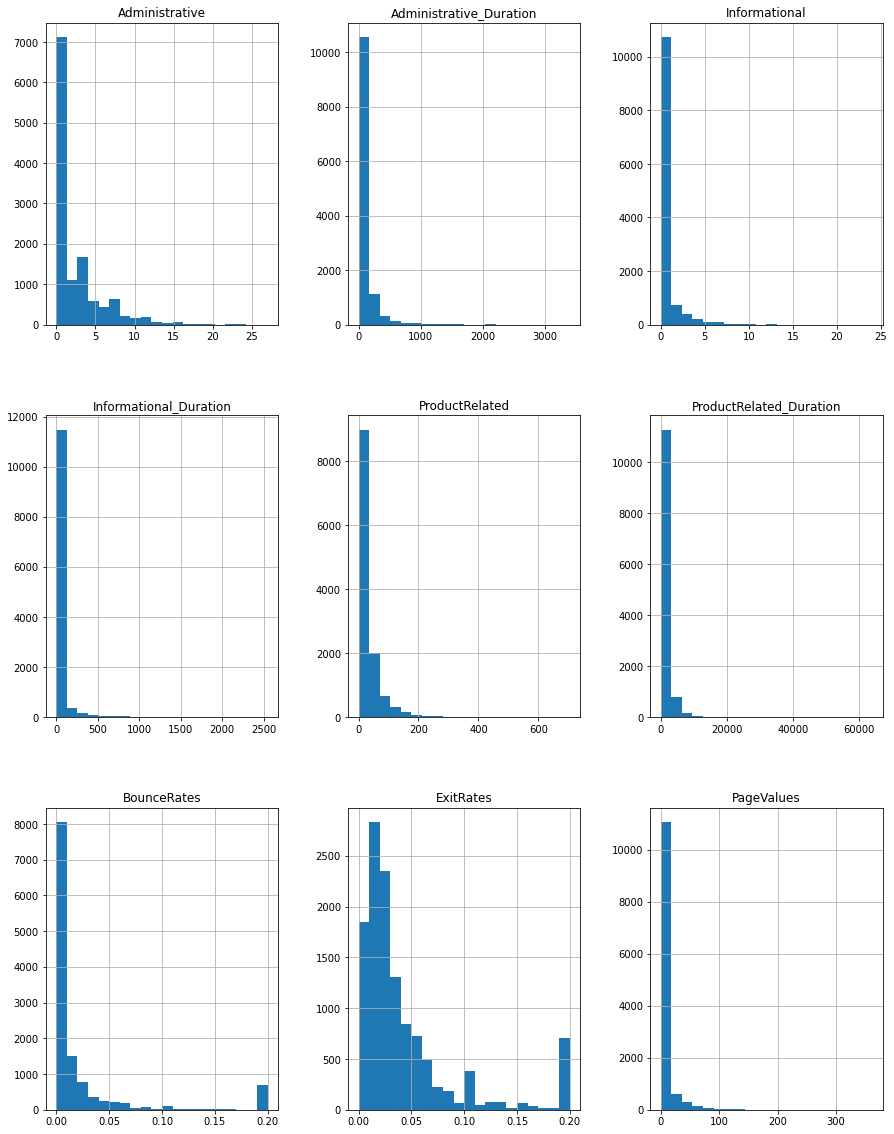

In [ ]:
osi_df.iloc[:,np.r_[0:9]].hist(bins=20, figsize = (15,20))
plt.show()

Jak widzimy w znacznej większości przypadków wgląd w dane zaburza nam to, że wartość 0 występuje kilkakrotnie razy więcej niż inne wartości. Aby sobie z tym poradzić zwizualizowaliśmy dane zlogarytmowane.

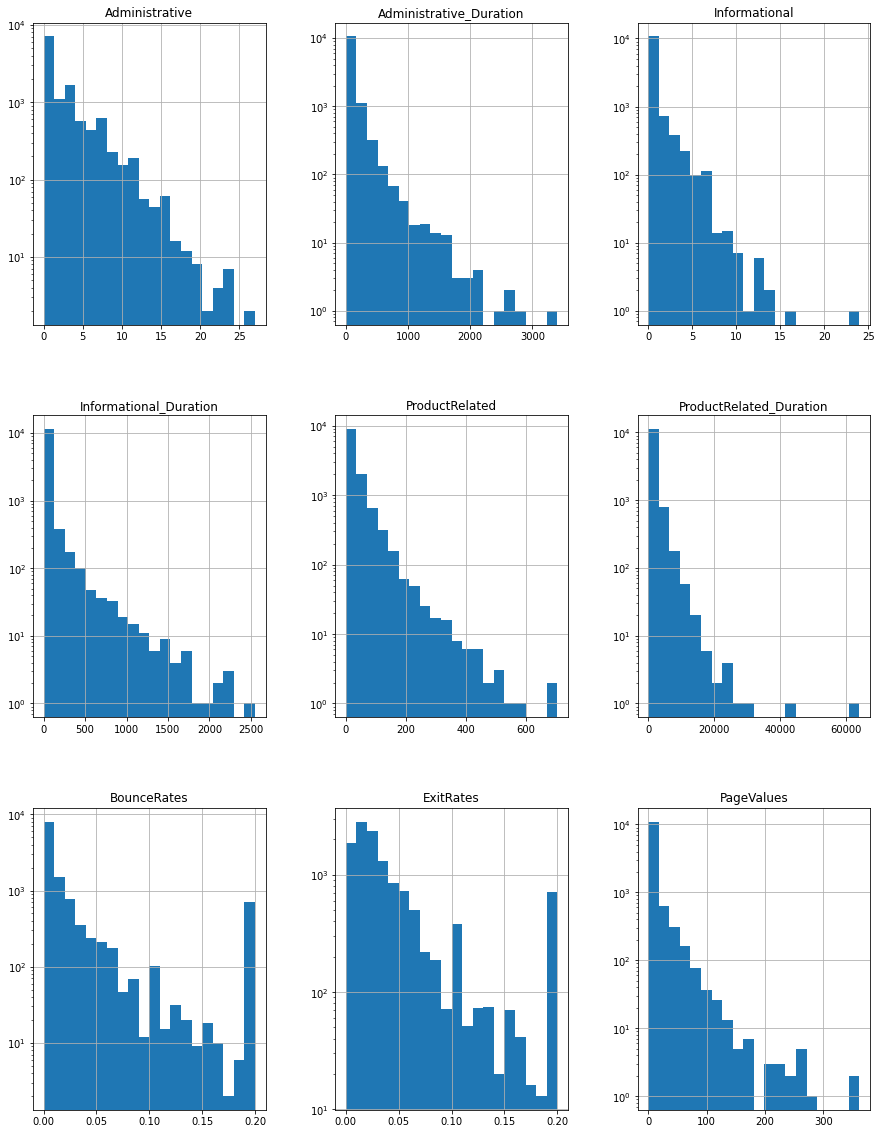

In [ ]:
osi_df.iloc[:,np.r_[0:9]].hist(bins=20, figsize = (15,20), log=True)
plt.show()


### Wykresy pudełkowe

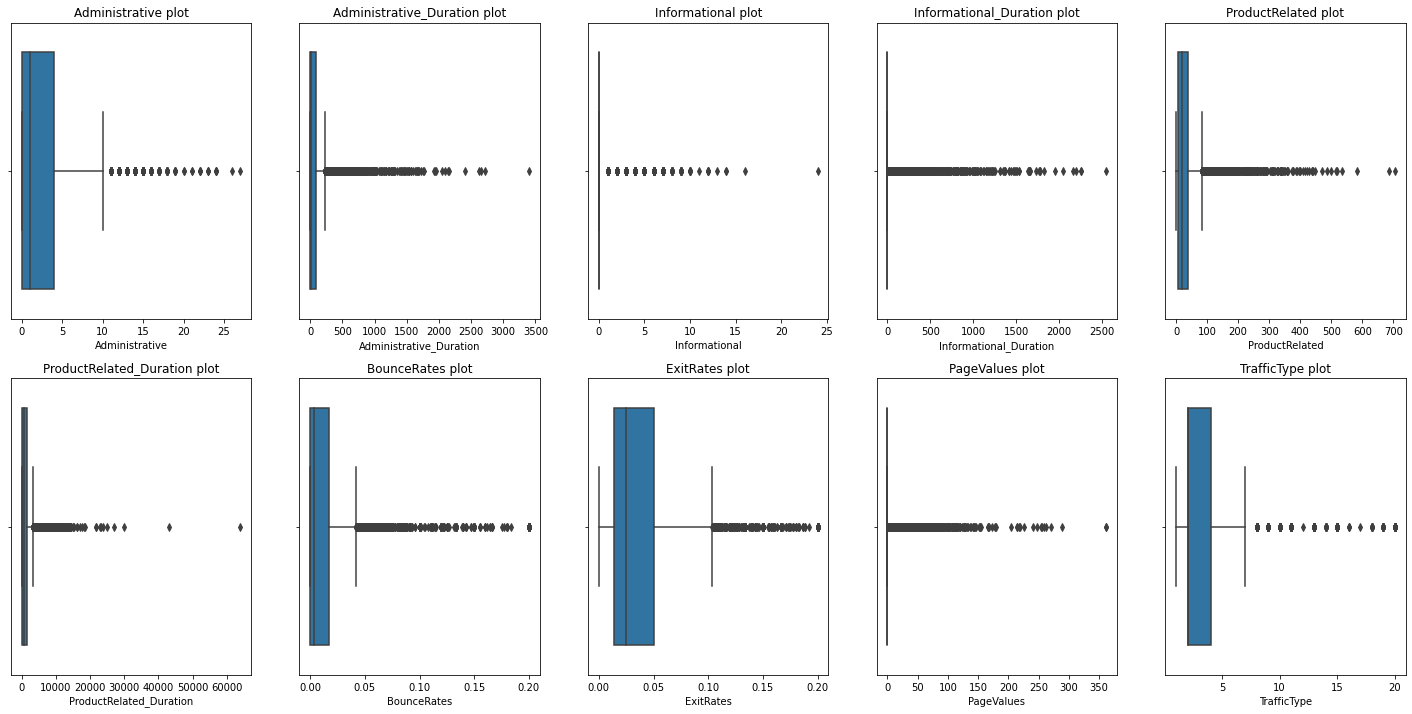

In [ ]:
j = 0
columns = osi_df.columns
fig, ax = plt.subplots(2,5)
for i in np.r_[0:9,14]:
  a,b = divmod(j, 5)
  sns.boxplot(osi_df.iloc[:,i], ax = ax[a,b])
  ax[a,b].set_title(columns[i] + " plot")
  j+=1
fig.set_figwidth(25)
fig.set_figheight(12)
fig.show()

Jak widać, wykresy pudełkowe pokazują liczne występowanie outlierów w powyższych kolumnach.

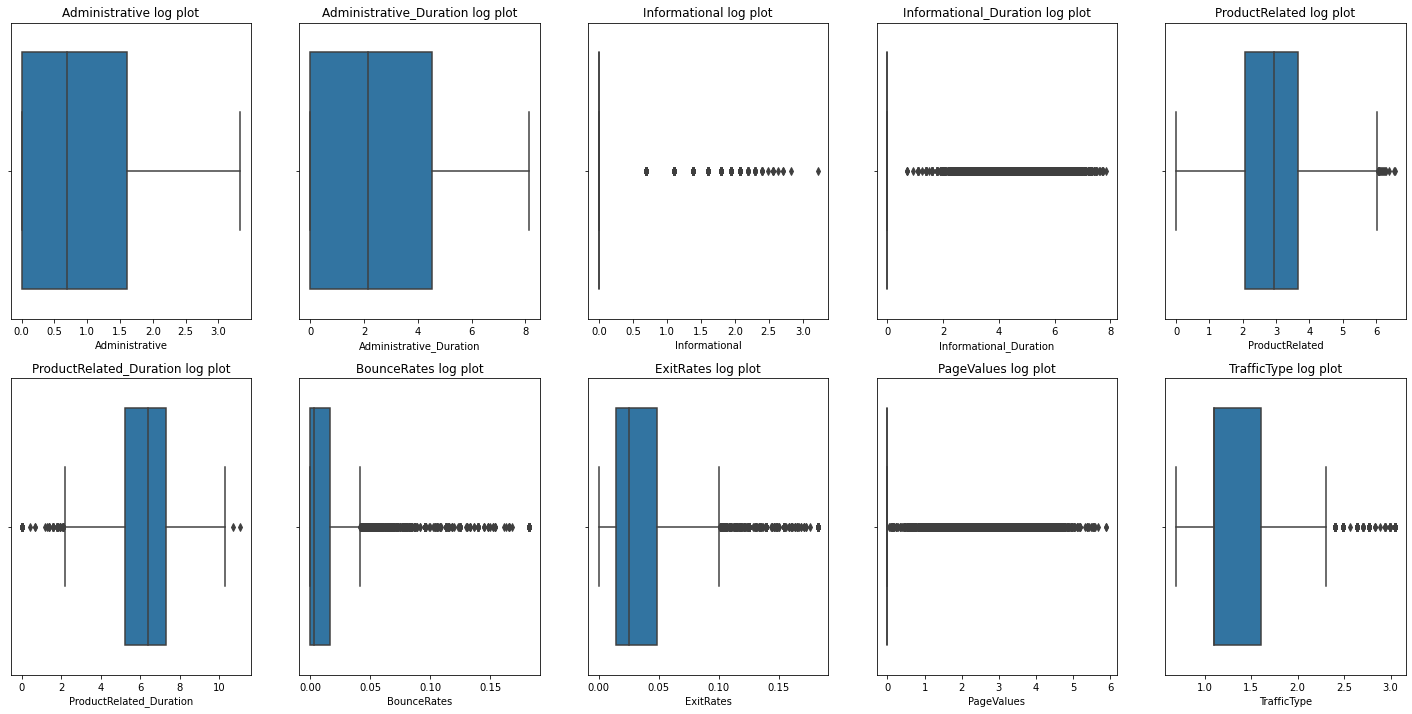

In [ ]:
j = 0
columns = osi_df.columns
fig, ax = plt.subplots(2,5)
for i in np.r_[0:9,14]:
  a,b = divmod(j, 5)
  sns.boxplot(np.log1p(osi_df.iloc[:,i]),ax =  ax[a,b])
  ax[a,b].set_title(columns[i] + " log plot")
  j+=1
fig.set_figwidth(25)
fig.set_figheight(12)
fig.show()

Dla porównania tak wyglądają ów wykresy po przekształceniu logarytmem- jak widać, w niektórych przypadkach niewiele się zmieniło.

### Zmienne kategoryczne

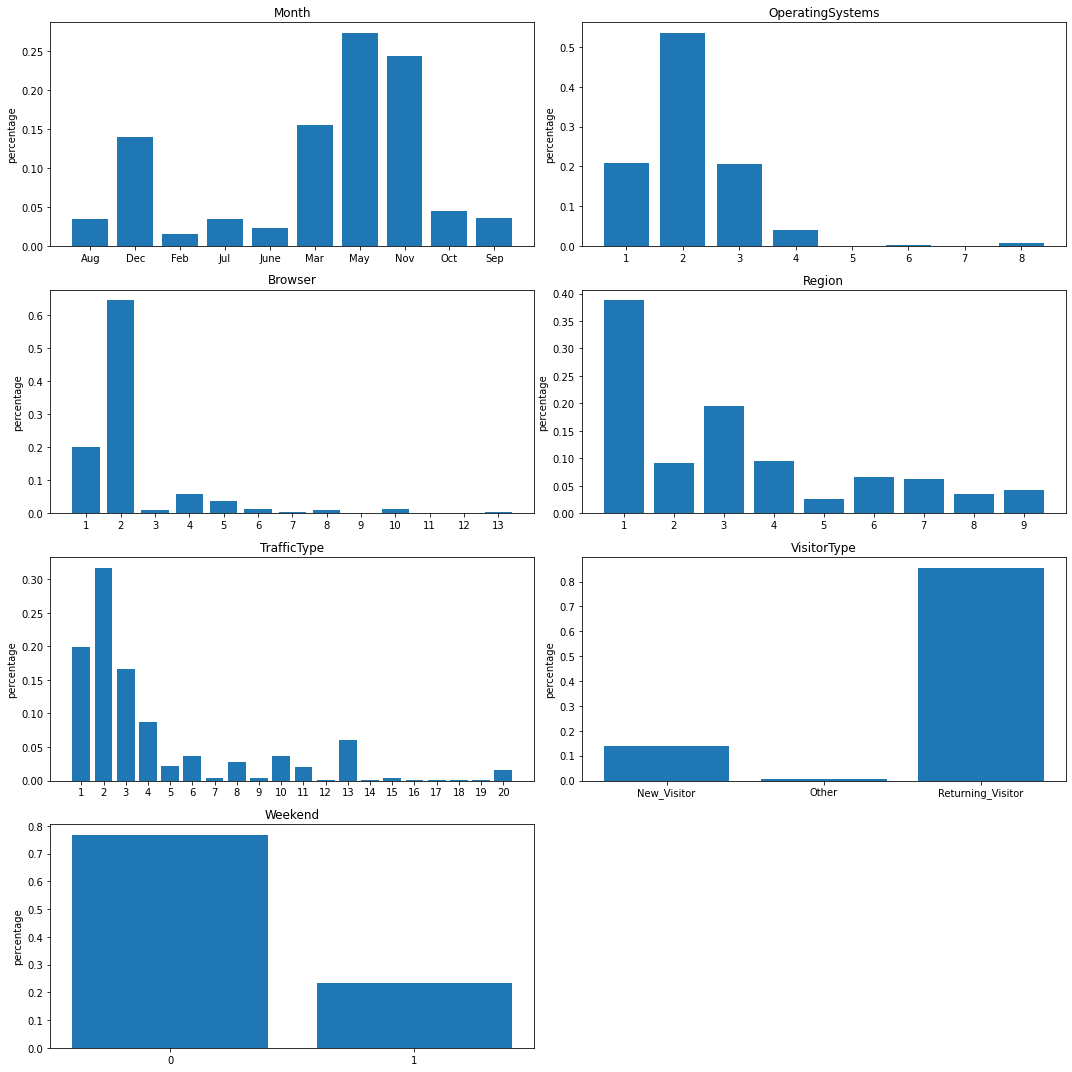

In [ ]:
j = 0
columns = list(osi_df.columns)
fig, ax = plt.subplots(4,2)
for i in np.r_[10:17]:
  a, b = divmod(j, 2)
  variable = osi_df.iloc[:,i]
  pmf = variable.value_counts().sort_index() / len(variable)
  data = pd.DataFrame({'x': pmf.index, 'y': pmf})
  ax[a,b].bar(pmf.index, pmf)
  ax[a,b].set_title(columns[j + 10])
  ax[a,b].set_ylabel('percentage')
  fig.set_figwidth(15)
  fig.set_figheight(15)
  j += 1
ax[1,0].set_xticks(range(1, 14))
ax[1,1].set_xticks(range(1, 10))
ax[2,0].set_xticks(range(1, 21))
ax[3,0].set_xticks([0, 1])
fig.delaxes(ax[3,1])
fig.tight_layout()

Jak widzimy, w przypadku większości zmiennych widzimy dominację jednej z wartości, jednak brak bardziej szczegółowego opisu danych uniemożliwia nam głębszą interpretację takich cech jak `Operating System`, `Region` czy `Browser`. Możemy jednak stwierdzić, że większość sesji miała miejsce w maju i listopadzie, w dnie nie weekendowe.

## Macierz korelacji

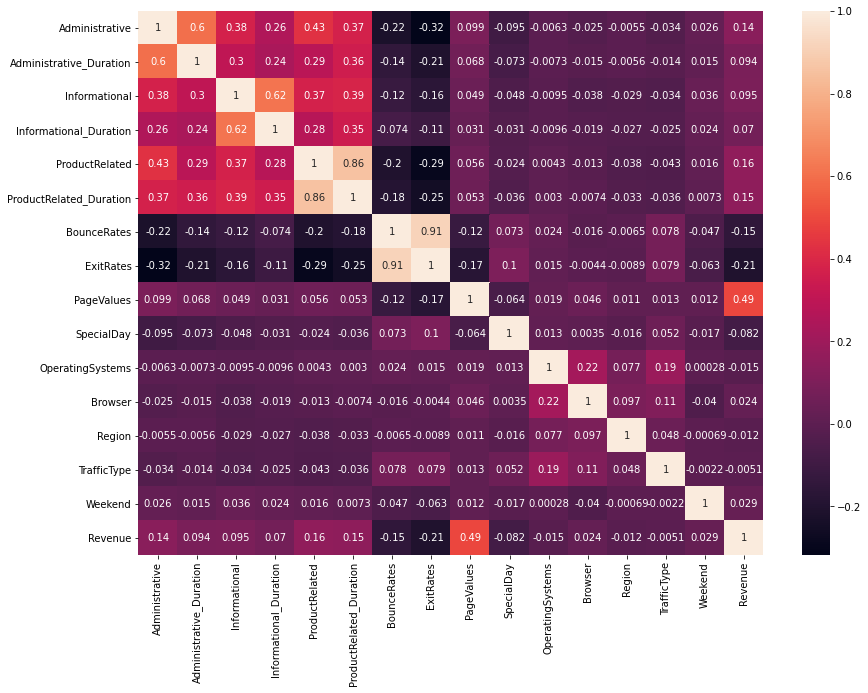

In [ ]:
corr = osi_df.corr()
sns.heatmap(corr, annot=True)
matplotlib.rcParams['figure.figsize'] = [14,10]
plt.show()

Widać wyraźną korelację między `ProductRelated_Duration` i `ProductRelated`- (co było do przewidzenia), oraz `ExitRates` i `BounceRates`.

Możliwe wyjaśnienie korelacji między `pagetype` a `page_duration`- im więcej stron jest odwiedzanych, tym dłuższy czas jest na nich spędzany ( informacje o kolumnach można znaleźć [tutaj](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#).)

## Szczegółowa analiza

In [ ]:
def scatter_maker(col1, col2):
  data = osi_df.loc[:,[col1, col2]]
  #data[col2] = np.log1p(data[col2])
  data = data[np.logical_and(data[col1] != 0, data[col1] <= data[col1].max() * 0.95)]
  data = data[data[col2] <= data[col2].max() * 0.95]
  data[col1] = pd.to_numeric(data[col1]) + np.random.normal(0, 0.2, len(data))
  sns.scatterplot(x=col1, y=col2, data=data)
  slope, intercept = np.polyfit(data[col1], data[col2], 1)
  plt.plot(data[col1], slope * data[col1] + intercept, color='red')
  plt.title('The ratio of the number of page views in a session to the time spent on it')
  matplotlib.rcParams['figure.figsize'] = [10,6]
  plt.show()

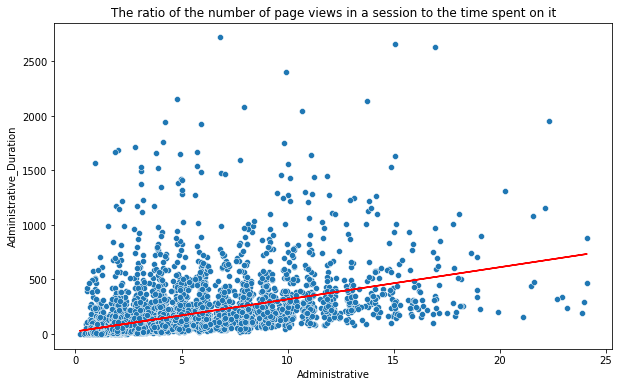

In [ ]:
scatter_maker('Administrative', 'Administrative_Duration')

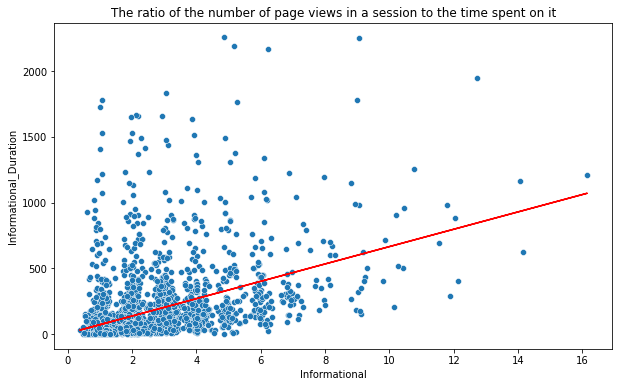

In [ ]:
scatter_maker('Informational', 'Informational_Duration')

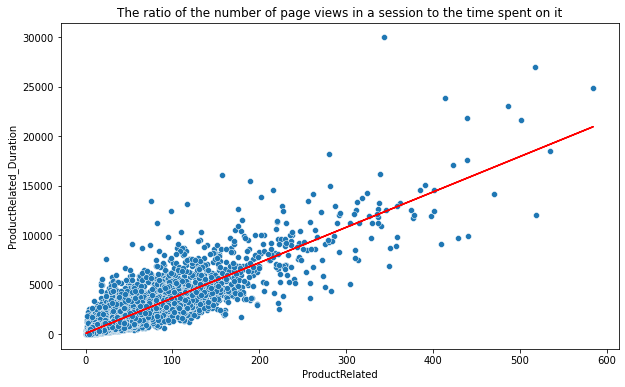

In [ ]:
scatter_maker('ProductRelated', 'ProductRelated_Duration')

Nasze przypuszczenia dotyczące korelacji między cechami `PageType` i `PageType_Duration` częściowo się potwierdziły - rzeczywiście im więcej odwiedzonych stron danego typu, tym więcej czasu spędzonego, ale nie jest to bardzo widoczna obserwacja (oprócz zmiennej `ProductRelated`.

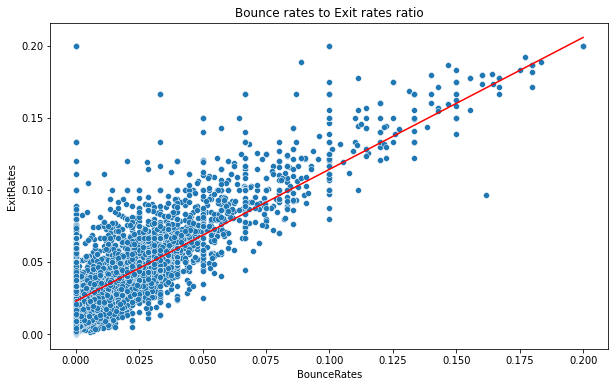

In [ ]:
sns.scatterplot(x='BounceRates', y='ExitRates', data=osi_df)
slope, intercept = np.polyfit(osi_df['BounceRates'], osi_df['ExitRates'], 1)
plt.plot(osi_df['BounceRates'], slope * osi_df['BounceRates'] + intercept, color='red')
plt.title('Bounce rates to Exit rates ratio')
matplotlib.rcParams['figure.figsize'] = [10,6]
plt.show()

Istnieje natomiast wyraźna liniowa zależność pomiędzy współczynnikami `Bounce Rate` i `Exit Rate`.

### Analiza danych zgrupowanych

Postanowiliśmy przyjrzeć się danym dotyczącym czasu spędzonego na różnego rodzaju stronach w odniesieniu do pogrupowanych danych kategorycznych. Wśród danych istnieje wyraźna przewaga `ProductRelated_Duration`, dlatego zdecydowaliśmy się zlogarytmować nasze dane.

In [ ]:
def multi_bar(data, labels, x_label, num):
  x = np.arange(num)
  width = 0.2
  plt.bar(x-0.2, np.log10(data['Administrative_Duration']), width, color='cyan')
  plt.bar(x, np.log10(data['Informational_Duration']), width, color='orange')
  plt.bar(x+0.2, np.log10(data['ProductRelated_Duration']), width, color='green')
  plt.xticks(x, labels)
  plt.xlabel(x_label)
  plt.ylabel("logarithmic average of the time spent")
  plt.legend(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'])
  plt.title('Average time spent on specific types of pages grouped by ' + x_label)
  plt.rcParams["figure.figsize"] = (10,5)
  plt.show()


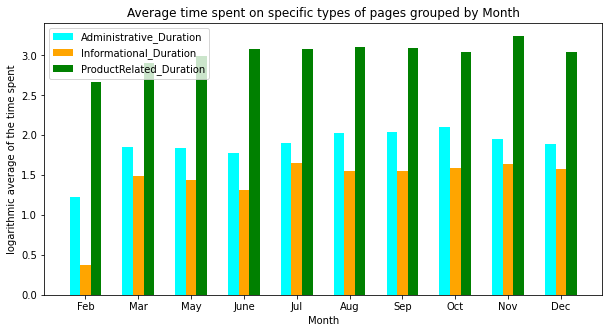

In [ ]:
months = ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

grouped_month = osi_df[['Month', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].groupby('Month').mean()
grouped_month = grouped_month.reindex(months, axis=0)

multi_bar(grouped_month, months, "Month", 10)

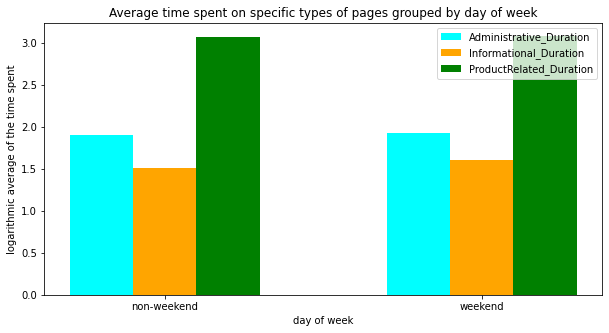

In [ ]:
grouped_weekend = osi_df[['Weekend', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].groupby('Weekend').mean()
multi_bar(grouped_weekend, ['non-weekend', 'weekend'], "day of week", 2)

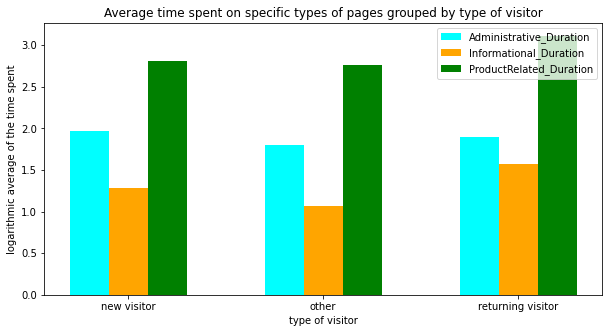

In [ ]:
grouped_visitors = osi_df[['VisitorType', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].groupby('VisitorType').mean()
multi_bar(grouped_visitors, ['new visitor', 'other', 'returning visitor'], "type of visitor", 3)

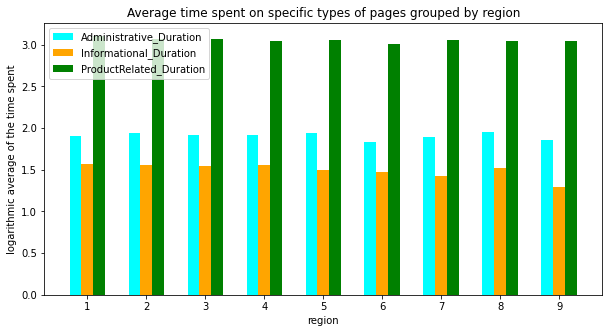

In [ ]:
grouped_region = osi_df[['Region', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].groupby('Region').mean()
multi_bar(grouped_region, range(1,10), "region", 9)

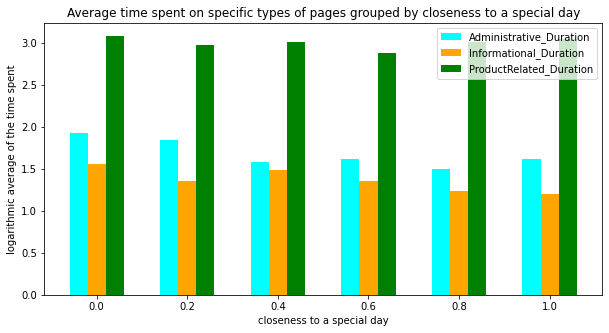

In [ ]:
grouped_specialday = osi_df[['SpecialDay', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].groupby('SpecialDay').mean()
multi_bar(grouped_specialday, np.around(np.linspace(0, 1, num=6).tolist(), 2), "closeness to a special day", 6)

Jak widać, rozkład we wszystkich grupach jest dość podobny - przoduje czas spędzony na stronach dotyczących produktów.

## Badanie zmiennej `Revenue` (nieaktualne, bo to klasteryzacja)

Sprawdzimy teraz rozkład naszych danych względem zmiennej `Revenue`, oznaczającej czy sesja zakończyła się zakupem, czy nie. Jest to najważniejsza zmienna w naszych danych, w zadaniu klasyfikacji traktowana by była jako Target.

In [7]:
osi_df['Browsing_duration'] = osi_df['Administrative_Duration'] + osi_df['Informational_Duration'] + osi_df['ProductRelated_Duration']

In [8]:
osi_df.groupby('Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Browsing_duration
Revenue,,,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392,0.227308,1173.964158
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.261530,2053.304285


Jak widać, Średnie wartości dobrze reprezentują nasze intuicje dotyczące rozkładu danych: tak więc np. średnio wykonanie zakupu wiąże się z dłuższym czasem przeglądania strony, `Bounce rates` są wyższe w przypadku niewykonania zakupu itd.

Przypomnienie: `Revenue=True` oznacza, że sesja zakończyła się zakupem.

Kilka ciekawszych zależności przedstawionych na wykresach:

In [9]:
def rev_bar(colname, data):
  sns.barplot(data = data, y = colname, x = 'Revenue')
  plt.title("Average " + colname + " and revenue outcome")
  plt.show()

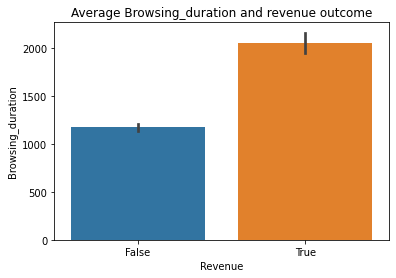

In [10]:
rev_bar('Browsing_duration', osi_df)

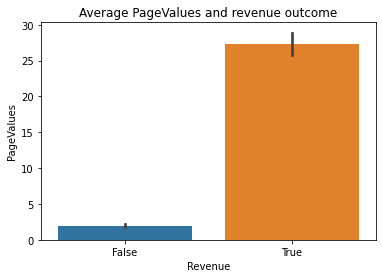

In [11]:
rev_bar('PageValues', osi_df)

`Page value`- wyliczany przez Google Analytics system punktowania stron, które doprowadziły przeglądającego do kupna.

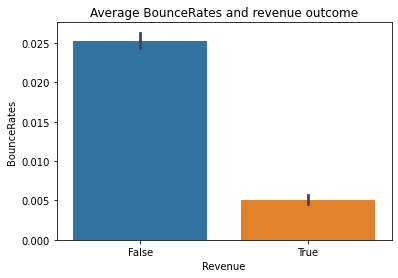

In [12]:
rev_bar('BounceRates', osi_df)

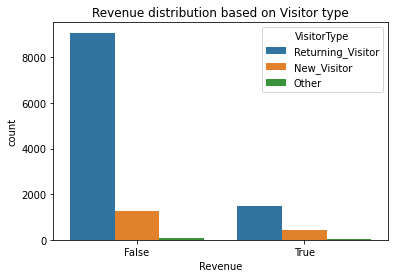

In [13]:
sns.countplot(data = osi_df, hue = 'VisitorType', x = 'Revenue')
plt.title("Revenue distribution based on Visitor type")
plt.show()

## PCA

Wykorzystamy PCA by spróbować zredukować liczbę wymiarów naszych danych i zwizualizować je wszystkie na jednym wykresie.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
X = osi_df.drop(['Browsing_duration', 'Revenue'], axis = 1)

In [ ]:
mths = {"Feb":1, "Mar":2, "May":3, "June":4, "Jul":5, "Aug":6, "Sep":7, "Oct":8, "Nov":9, "Dec":10}
visitors = {"Returning_Visitor":1, "New_Visitor":2, "Other":3}
X['Month'] = X['Month'].map(mths)
X['VisitorType'] = X['VisitorType'].map(visitors)

In [ ]:
pca = PCA(n_components=3)
comps = pca.fit_transform(X)


In [ ]:
revs = {True:"Purchase",False:"Exit"}

In [ ]:
fig = px.scatter_3d(
    np.log1p(comps), x=0, y=1, z=2, color=osi_df['Revenue'].map(revs),
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    title = "3D plot after PCA"
)
fig.show()

Dane na wykresie zostały też zlogarytmowane, by poprawić widoczność. Nie widać jednak żadnych ciekawych zależności.